### Завдання:
 - Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com
(https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)

In [3]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

# Download and load the dataset
path = kagglehub.dataset_download("kaggle/us-baby-names", path="NationalNames.csv")
df = pd.read_csv(zipfile.ZipFile(path).open("NationalNames.csv"))


 - Виконайте вправи по варіантах. Для розрахунку номеру варіанту
скористуватися формулою. N = (n + 4 ) % 5 + 1 , де N – номер варіанту, n –
номер у списку групи.


In [4]:
MY_NUMBER_IN_GROUP = 8

print("Mій варіант:", (MY_NUMBER_IN_GROUP + 4) % 5 + 1)

Mій варіант: 3


Завдання до виконання: 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18,
19, 20, 21, 23, 25, 27

---

#### 1. Виведіть перші 8 рядків набору даних.


In [58]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


#### 2. Вивести останні 8 рядків набору даних

In [90]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


#### 4. Отримайте загальну інформацію про дані у наборі даних.

In [60]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


#### 5. Знайдіть кількість унікальних імен у наборі даних


In [64]:
# 5. Find the total number of unique names in the dataset
unique_names_count = df['Name'].nunique()
unique_names_count

93889

#### 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [9]:
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()
print("\nUnique female names:", unique_female_names)
print("Unique male names:", unique_male_names)


Unique female names: 64911
Unique male names: 39199


#### 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році


In [66]:

top_male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')].nlargest(5, 'Count')
top_male_names_2010

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


#### 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [68]:
most_popular_name = df.loc[df['Count'].idxmax(), ['Year', 'Name']]
print("\nMost popular name is", most_popular_name['Name'], "in", most_popular_name['Year'])


Most popular name is Linda in 1947


#### 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [69]:
min_count_entries = len(df[df['Count'] == df['Count'].min()])
min_count_entries

254615

#### 10. Підрахуйте кількість унікальних імен у кожному році

In [81]:
unique_names_per_year = df.groupby('Year')['Name'].nunique().reset_index(name='Count')

unique_names_per_year

,Year,Count
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


#### 11. Знайдіть рік із найбільшою кількістю унікальних імен

In [72]:
year_most_unique_names = unique_names_per_year.idxmax()
names_count_in_peak_year = unique_names_per_year.loc[year_most_unique_names]
print("\nYear with the most unique names:", year_most_unique_names)
print("Count of unique names in that year:", names_count_in_peak_year)


Year with the most unique names: 2008
Count of unique names in that year: 32488


#### 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [75]:
year_jacob_most_popular_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].nlargest(1, 'Count')

year_jacob_most_popular_female

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


#### 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [77]:
years_more_girls_than_boys = (
    df.groupby(['Year', 'Gender'])['Count'].sum().unstack().apply(lambda x: x['F'] > x['M'], axis=1).sum()
)
print("\nYears with more girls born than boys:", years_more_girls_than_boys)


Years with more girls born than boys: 54


#### 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.


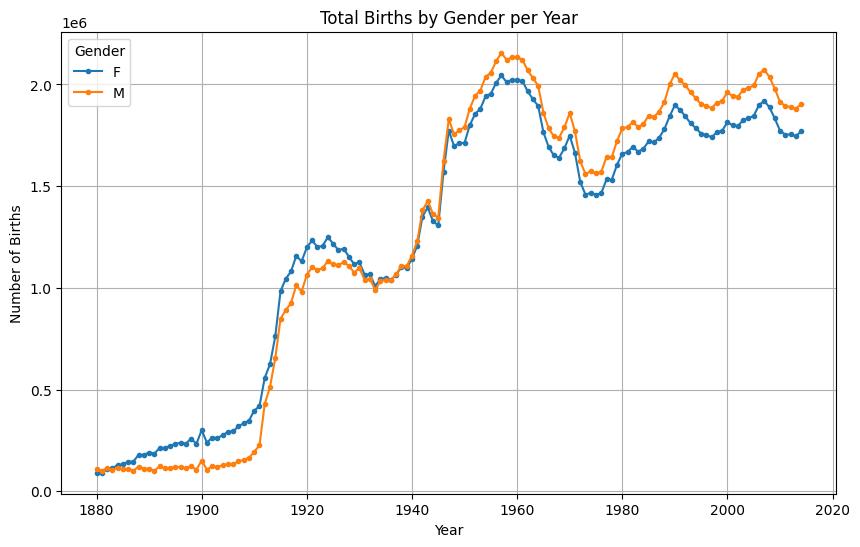

In [42]:
births_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
births_per_year.plot(kind='line', figsize=(10, 6), marker='.')
plt.title("Total Births by Gender per Year")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.grid(True)
plt.legend(title="Gender")
plt.savefig("total_births_by_gender_per_year.png", format="png")
plt.show()

#### 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)


In [18]:
gender_neutral_names_count = df.groupby('Name')['Gender'].nunique().eq(2).sum()
print("\nNumber of gender-neutral names:", gender_neutral_names_count)


Number of gender-neutral names: 10221


#### 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [19]:
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print("\nNumber of boys named 'Barbara':", boys_named_barbara)


Number of boys named 'Barbara': 4139


#### 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)


In [79]:
gender_neutral_names = df.groupby('Name').filter(lambda x: x['Gender'].nunique() == 2)
popular_gender_neutral_names = gender_neutral_names.groupby('Name')['Count'].sum().nlargest(10).reset_index(name='Total count')

popular_gender_neutral_names

,Name,Total count
0,James,5129096
1,John,5106590
2,Robert,4816785
3,Michael,4330805
4,Mary,4130441
5,William,4071368
6,David,3590557
7,Joseph,2580687
8,Richard,2564867
9,Charles,2376700


#### 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

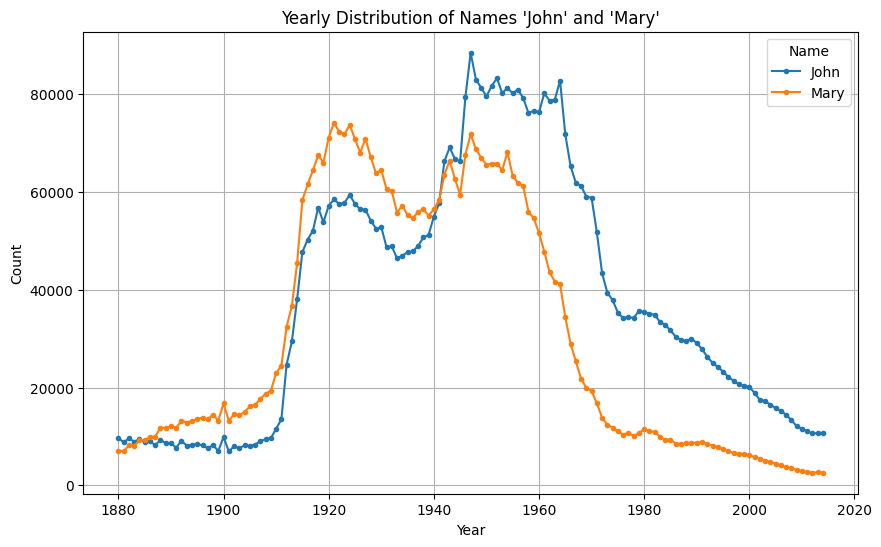

In [43]:
john_mary_counts = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary_counts.plot(figsize=(10, 6), marker='.')
plt.title("Yearly Distribution of Names 'John' and 'Mary'")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.legend(title="Name")
plt.savefig("john_mary_distribution.png", format="png")
plt.show()

#### 27. Знайти найпопулярніші імена в кожному році.


In [95]:

most_popular_name_per_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]

most_popular_name_per_year

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
